In [1]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [2]:
breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=44)

In [5]:
clf = LogisticRegression(penalty='l2', C=0.01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\lipey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.9627659574468085


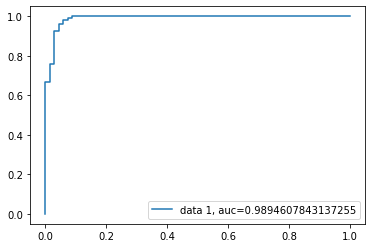

In [7]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()